In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
#!pip install --upgrade fastai

In [6]:
import fastai
fastai.__version__

'2.7.12'

In [7]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [9]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:16<00:00, 172MB/s]
100% 2.70G/2.70G [00:16<00:00, 171MB/s]


In [10]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [11]:
data_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
#train ve teste qeder olani path edirik

In [12]:
tfms_for_item = RandomResizedCrop(128, min_scale = 0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)] #pytorch-da 0.5,0.5, 0.5
data = ImageDataLoaders.from_folder(data_path, item_tfms = tfms_for_item,
                                    batch_tfms= tfms_for_batch,bs = 64,
                                    valid_pct = 0.15, shuffle = True) #pytorch-da imagefolder-di

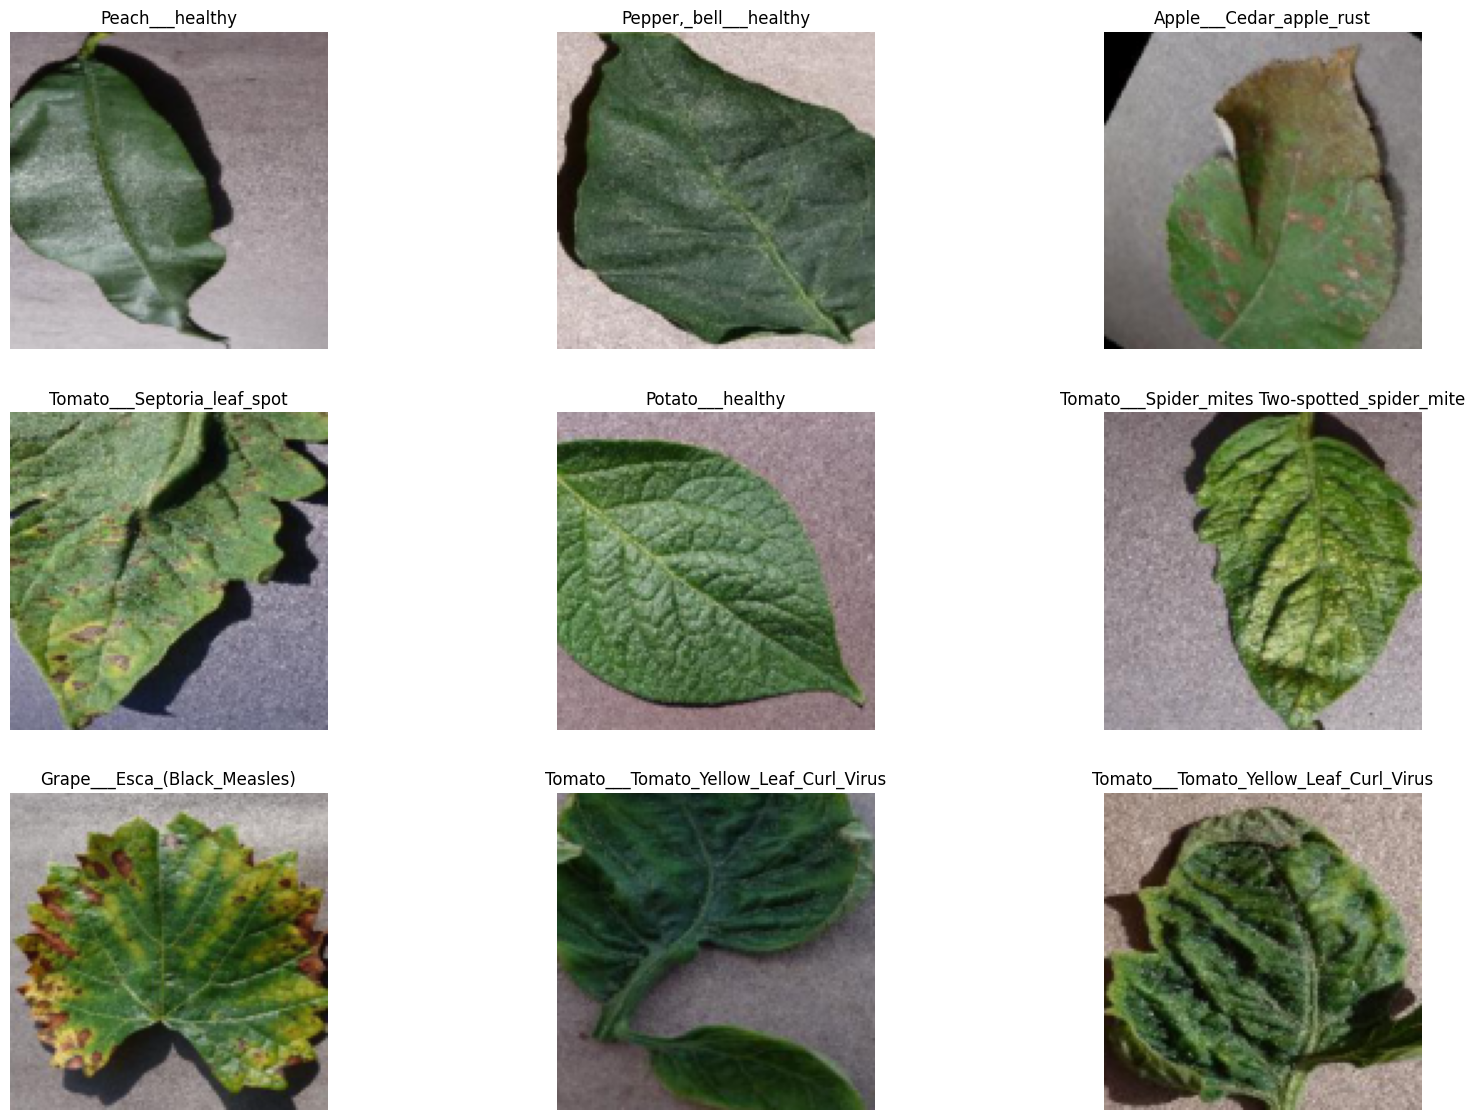

In [13]:
data.show_batch(figsize = (20,14)) #bir batchi mene gorset

In [14]:
print('Number  of classes', data.c) #38 xeste class novu  var

Number  of classes 38


In [15]:
model = cnn_learner(data, resnet50, metrics = accuracy)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

SuggestedLRs(valley=0.0006918309954926372)

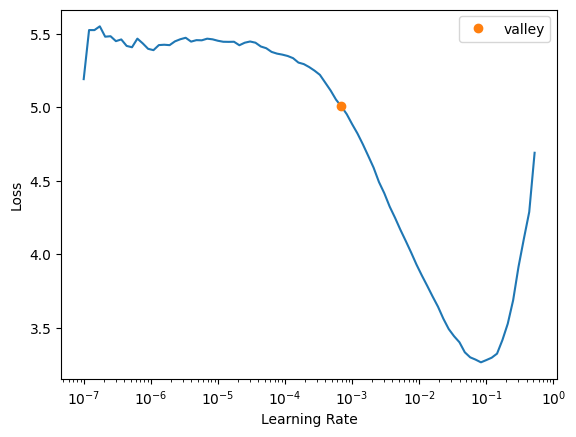

In [16]:
model.lr_find()

# New Section

In [18]:
model.fit_one_cycle(3,0.00069)


In [19]:
model.save('my_model.pkl')

Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/models/my_model.pkl.pth')

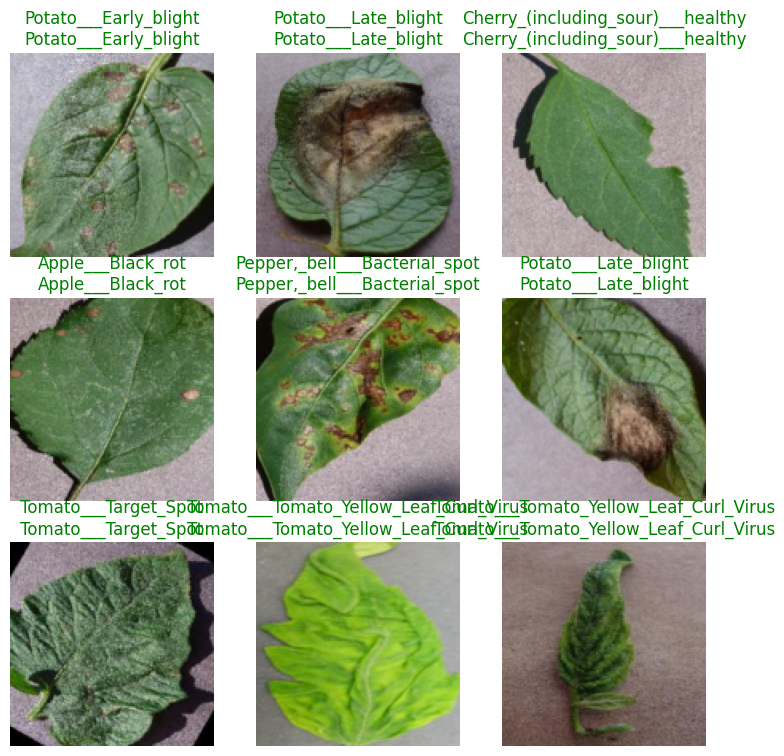

In [20]:
model.show_results()

In [22]:
interp=ClassificationInterpretation.from_learner(model)

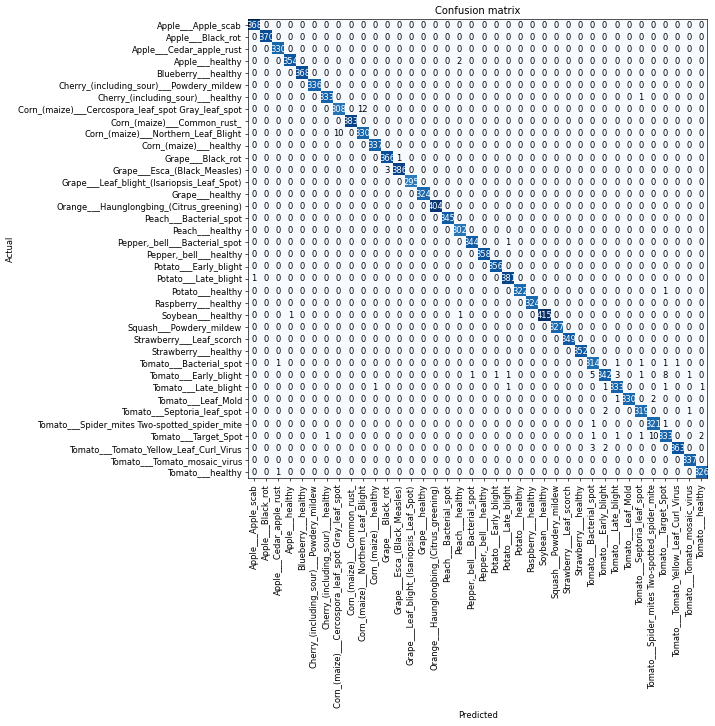

In [24]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [25]:
interp.most_confused(min_val = 2)

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  12),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  10),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 10),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 8),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 5),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 3),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 3),
 ('Apple___healthy', 'Peach___healthy', 2),
 ('Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 2),
 ('Tomato___Target_Spot', 'Tomato___healthy', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 2)]

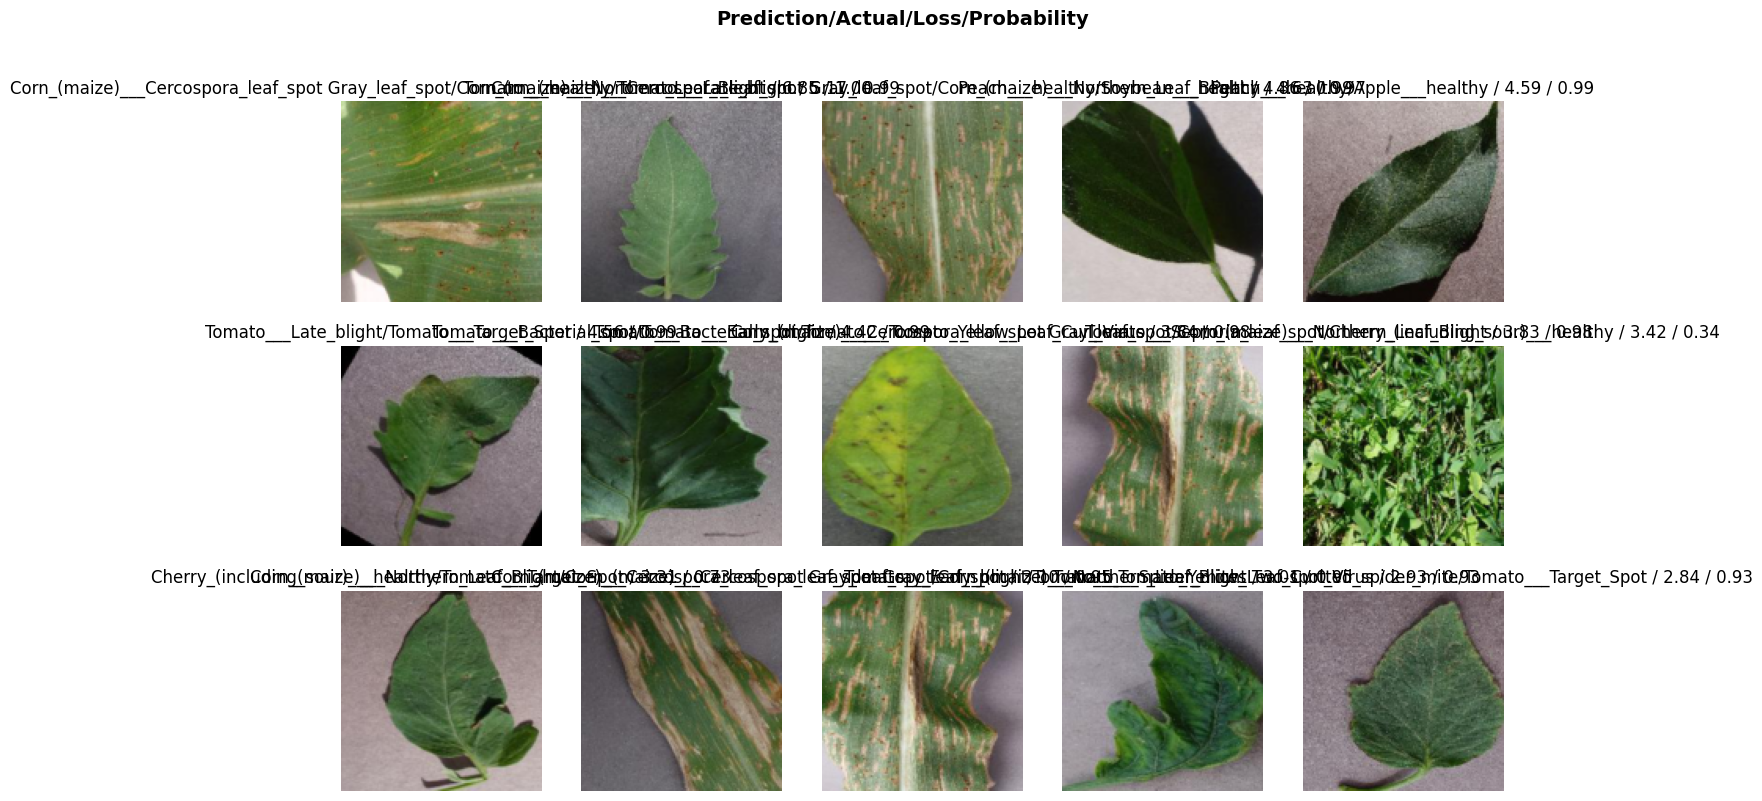

In [29]:
interp.plot_top_losses(k=15)